## Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
from scipy.integrate import solve_ivp

## Define All Possible Events (test merge)

In [7]:
def infect(X, Y):
    """
    Infect one susceptible individual and increase the infected count.

    Parameters:
        X (int): Number of susceptible individuals.
        Y (int): Number of infected individuals.

    Returns:
        tuple: Updated counts of susceptible (X) and infected (Y).
    """
    X -= 1
    Y += 1
    return (X, Y)

def recover(Y, Z):
    """
    Recover one infected individual and increase the recovered count.

    Parameters:
        Y (int): Number of infected individuals.
        Z (int): Number of recovered individuals.

    Returns:
        tuple: Updated counts of infected (Y) and recovered (Z).
    """
    Y -= 1
    Z += 1
    return (Y, Z)

def birth(X):
    """
    Increase the number of susceptible individuals by one.

    Parameters:
        X (int): Number of susceptible individuals.

    Returns:
        int: Updated count of susceptible individuals.
    """
    X += 1
    return X

def death_from_X(X):
    """
    Decrease the number of susceptible individuals by one due to death.

    Parameters:
        X (int): Number of susceptible individuals.

    Returns:
        int: Updated count of susceptible individuals.
    """
    X -= 1
    return X

def death_from_Y(Y):
    """
    Decrease the number of infected individuals by one due to death.

    Parameters:
        Y (int): Number of infected individuals.

    Returns:
        int: Updated count of infected individuals.
    """
    Y -= 1
    return Y

def death_from_Z(Z):
    """
    Decrease the number of recovered individuals by one due to death.

    Parameters:
        Z (int): Number of recovered individuals.

    Returns:
        int: Updated count of recovered individuals.
    """
    Z -= 1
    return Z




## Implement GSP 

- Add a way to control noise level (gsp function)

In [8]:
    

def gsp(N, X, Y, Z, beta, gamma, mu, end):
    """
    Simulates the disease spread using a Gillespie Stochastic Process (GSP) approach.

    Parameters:
        N (int): Total population size.
        X (int): Initial number of susceptible individuals.
        Y (int): Initial number of infected individuals.
        Z (int): Initial number of recovered individuals.
        beta (float): Infection rate.
        gamma (float): Recovery rate.
        mu (float): Natural death/birth rate.
        end (float): Time until the simulation ends.

    Returns:
        tuple: A list of time events and a list of population data over time.
    """
    
    t = 0
    
    # Minimum delta_t. Helps avoid taking steps that are too small. Greatly reduces computation time.
    delta_t_min = 1e-3
    
    t_events = []
    y_data = []
    
    while t <= end:
        
        # This queue collects the delta_t of each event at time t + delta_t
        event_queue = {}

        if X > 0 and Y > 0:
            dt_infection = -1 / (beta * X * Y / N) * np.log(np.random.uniform(0, 1))
        else:
            dt_infection = float('inf')

        if Y > 0:
            dt_recovery = -1 / (gamma * Y) * np.log(np.random.uniform(0, 1))
        else:
            dt_recovery = float('inf')

        dt_birth = -1 / (mu * N) * np.log(np.random.uniform(0, 1))

        if X > 0:
            dt_death_X = -1 / (mu * X) * np.log(np.random.uniform(0, 1))
        else:
            dt_death_X = float('inf')

        if Y > 0:
            dt_death_Y = -1 / (mu * Y) * np.log(np.random.uniform(0, 1))
        else:
            dt_death_Y = float('inf')

        if Z > 0:
            dt_death_Z = -1 / (mu * Z) * np.log(np.random.uniform(0, 1))
        else:
            dt_death_Z = float('inf')

        
        # Add all event probabilities for time t + delta_t to queue 
        event_queue['inf'] = dt_infection
        event_queue['rec'] = dt_recovery
        event_queue['birth'] = dt_birth
        event_queue['death_X'] = dt_death_X
        event_queue['death_Y'] = dt_death_Y
        event_queue['death_Z'] = dt_death_Z

        
        # Select the event with the smallest delta_t
        sorted_queue = dict(sorted(event_queue.items(), key=lambda item: item[1]))
        first_event_key, first_event_time = list(sorted_queue.items())[0]
        first_event_time = max(first_event_time, delta_t_min)
        
        
        t += first_event_time
        t_events.append(t)

        # Handle each type of event
        if first_event_key == 'inf':
            X, Y = infect(X, Y)
        elif first_event_key == 'rec':
            Y, Z = recover(Y, Z)
        elif first_event_key == 'birth':
            X = birth(X)
        elif first_event_key == 'death_X':
            X = death_from_X(X)
        elif first_event_key == 'death_Y':
            Y = death_from_Y(Y)
        elif first_event_key == 'death_Z':
            Z = death_from_Z(Z)

        y_data.append([X, Y, Z])
    
    return (t_events, y_data)

            

        


## Run Stochastic Simulation

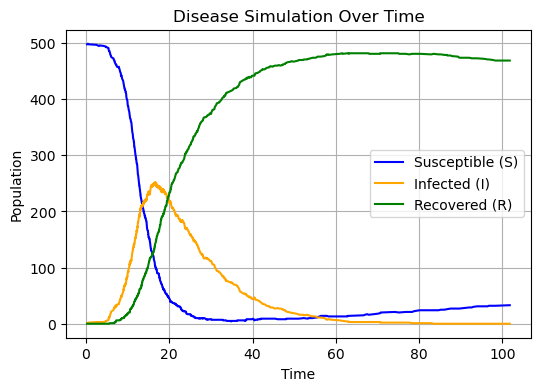

In [9]:
def run_simulation(N, X_0, Y_0, Z_0, beta, gamma, mu, t_span):
    """
    Runs the disease simulation and plots the results.

    Parameters:
        N (int): Total population.
        X_0 (int): Initial susceptible population.
        Y_0 (int): Initial infected population.
        Z_0 (int): Initial recovered population.
        beta (float): Infection rate.
        gamma (float): Recovery rate.
        mu (float): Natural birth/death rate.
        t_span (int): Duration of the simulation.
    """
    t_events, y_data = gsp(N, X_0, Y_0, Z_0, beta, gamma, mu, t_span)

    y_data = np.array(y_data)

    X = y_data[:, 0]
    Y = y_data[:, 1]
    Z = y_data[:, 2]

    plt.figure(figsize=(6, 4))
    plt.plot(t_events, X, label='Susceptible (S)', color='blue')
    plt.plot(t_events, Y, label='Infected (I)', color='orange')
    plt.plot(t_events, Z, label='Recovered (R)', color='green')

    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Disease Simulation Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


    
# Parameters
N = 500
X_0 = N - 1
Y_0 = N - X_0
Z_0 = 0
beta = 0.6
gamma = 0.1
mu = 0.001
t_span = 100


run_simulation(N, X_0, Y_0, Z_0, beta, gamma, mu, t_span)


## Implement Deterministic SIR

- There's a bug and I can't find it :( look at plot

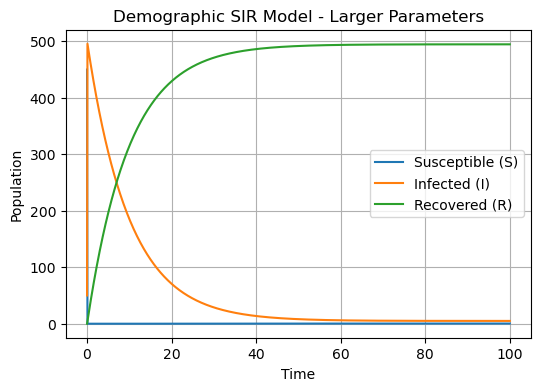

In [49]:
def demo_model(t, y0, beta, gamma, mu):
    """
    Defines the vaccination SIR model differential equations.

    Parameters:
        t (float): Time variable (not used in the model but required for ODE solver).
        y0 (list): Initial conditions [S0, I0, R0].
        beta (float): Infection rate.
        gamma (float): Recovery rate.
        mu (float): Natural death/birth rate.

    Returns:
        list: Derivatives [dSdt, dIdt, dRdt].
    """
    
    S, I, R = y0  
    dSdt = mu * (S + I + R/N) - beta * S * I - mu * S
    dIdt = (beta * S * I/N) - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    return [dSdt, dIdt, dRdt]


def demo_simulation():
    """
    Simulates the demographic SIR model for two sets of parameters and plots the results.
    The function uses the solve_ivp method to solve the SIR model equations and displays
    the populations of Susceptible, Infected, and Recovered individuals over time for 
    both parameter sets in separate graphs.
    """
    
    t_demo = np.linspace(0, t_span, 1000)
    sol_demo = solve_ivp(demo_model, [0, t_span], [X_0, Y_0, Z_0], args=(beta, gamma, mu), dense_output=True)
    Z_demo = sol_demo.sol(t_demo)

    plt.figure(figsize=(6, 4))
    plt.plot(t_demo, Z_demo[0], label='Susceptible (S)')
    plt.plot(t_demo, Z_demo[1], label='Infected (I)')
    plt.plot(t_demo, Z_demo[2], label='Recovered (R)')
    
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Demographic SIR Model - Larger Parameters')
    plt.legend()
    plt.grid(True)
    plt.show()





demo_simulation()

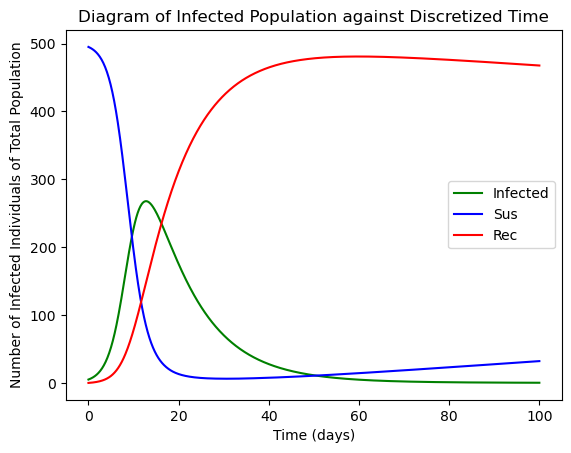

In [10]:
beta = 0.6
gamma = 0.1
birth = 0.001
death = 0.001

# Initial conditions with 99% susceptible, 1% infected and 0% recovered and a population of 100 people
s0 = 0.99
i0 = 0.01
r0 = 0
N = 500

# Creates a list of initial condition values
initial_conditions = [s0 * N, i0 * N, r0 * N]

# Creates an array for each time measurement with 1600 samples, equally spaced between 0 and 1000
time = np.linspace(0, 100, 1000)

# Calculates the ODEs and returns as a list
def calc_ode(t, sir, beta, gamma, birth, death, N):
    sus, inf, rec = sir
    dSdt = birth*N - ((beta * sus * inf)/ N) - (death * sus)
    dIdt = ((beta * sus * inf) / N) - (gamma * inf) - (death * inf)
    dRdt = (gamma * inf) - (death * rec)
    return [dSdt, dIdt, dRdt]

# Solves for epidemic scenario with scipy.integrate function solove_ivp: 
sir_integration = solve_ivp(calc_ode, [time[0], time[-1]], initial_conditions, args=(beta, gamma, birth, death, N), t_eval=time)

# Assigns y values of sir_integration to correct labels, for later plotting
sus, inf, rec = sir_integration.y

# Plots results
plt.plot(time, inf, label='Infected', color='g')
plt.plot(time, sus, label='Sus', color='b')
plt.plot(time, rec, label='Rec', color='r')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected Individuals of Total Population')
plt.legend()
plt.title('Diagram of Infected Population against Discretized Time')
plt.show()